# Rectangularly periodic FFT tutorial

The rectangularly periodic hexagonal FFT assumes a signal with a parallelopiped region of support (a rectangle in oblique coordinates) is periodic in the orthogonal *x* and *y* directions (crucially, the *y* direction of periodicity is straight up, not along the oblique *y* axis).

The discrete Fourier modes of this transform on an $N_1$x$N_2$ grid are given by

$M_{k_1, k_2}(n_1, n_2) = \exp \big(2 \pi i \big(\frac{1}{N_1}n_1 (k_1 - k_2/2) + \frac{1}{N_2}n_2 k_2\big)\big)$

The FFT implemented here is as described in

> J. C. Ehrhardt, “Hexagonal fast Fourier transform with rectangular output,” IEEE Transactions on Signal Processing, vol. 41, no. 3. Institute of Electrical and Electronics Engineers (IEEE), pp. 1469–1472, Mar. 1993. doi: 10.1109/78.205759. 

Here we demonstrate the `fft` and `ifft` for rectangular periodicity. Let's plot the (1, 1) mode.

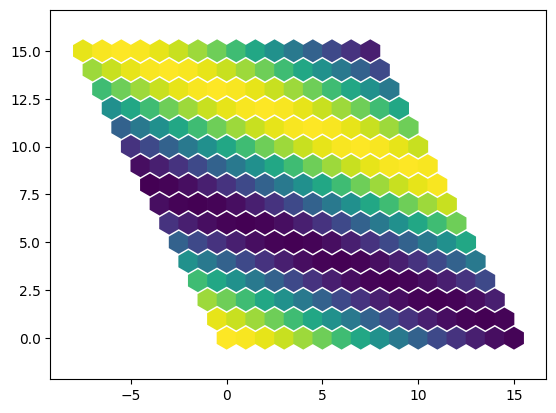

In [2]:
from hexfft import HexArray
from hexfft.plot import hexshow
import numpy as np
from hexfft.array import _generate_grid, rect_shift

N = 16
n1, n2 = np.meshgrid(np.arange(N), np.arange(N))

# plot 1, 1 mode
mode00 = np.exp(2 * np.pi * 1.0j * (n1/(2*N) + (n2/N)))
h = HexArray(mode00, "oblique")
hexshow(np.real(h))


As expected, this mode is a sinusoidal plane wave traveling in a direction with equal components along both oblique axes. Also as expected, its Fourier transform is an impulse at the (1, 1) position in the grid:

Text(0.5, 1.0, 'IFT')

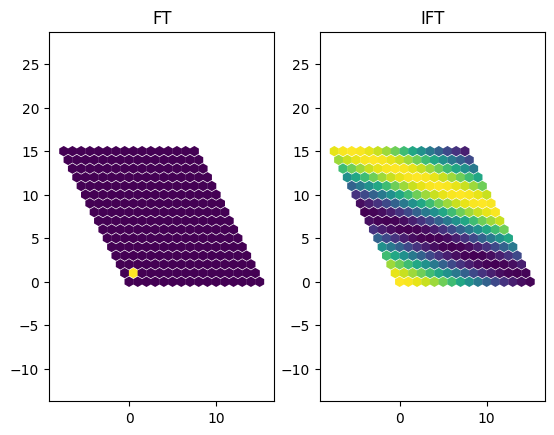

In [9]:
from hexfft import fft, ifft
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)
H = fft(h)
hexshow(np.real(H), ax=ax[0])
ax[0].set_title("FT")
hh = ifft(H)
hexshow(np.real(hh), ax=ax[1])
ax[1].set_title("IFT")

The rectangular periodic transform can also be used for a signal with support on a physically rectangular grid by shifting the signal to an equivalent parallelopiped region and performing the same transform. Take for example, the following signal:

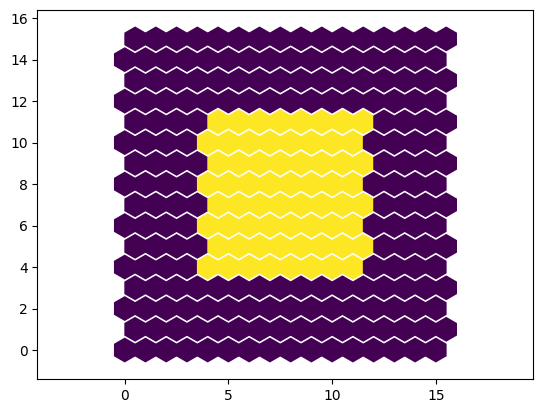

In [12]:
data = np.zeros((N, N))
data[N//4:-N//4, N//4:-N//4] = 1
h = HexArray(data, "offset")
hexshow(h)

Using the in-built functions `rect_shift` and `rect_unshift`, a rectangularly periodic signal can be converted between its parallelopiped and rectangular regions of support.

- `rect_shift()` ingests a `HexArray` with offset coordinates and returns a `HexArray` with oblique coordinates.
- `rect_unshift()` ingests a `HexArray` with oblique coordinates and returns a `HexArray` with offset coordinates.

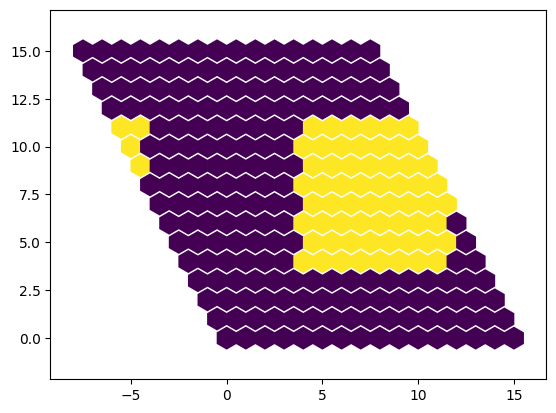

In [15]:
from hexfft.array import rect_shift, rect_unshift

h_shifted = rect_shift(h)
# now in oblique coordinates
hexshow(h_shifted)

We can shift this back whenever we like:

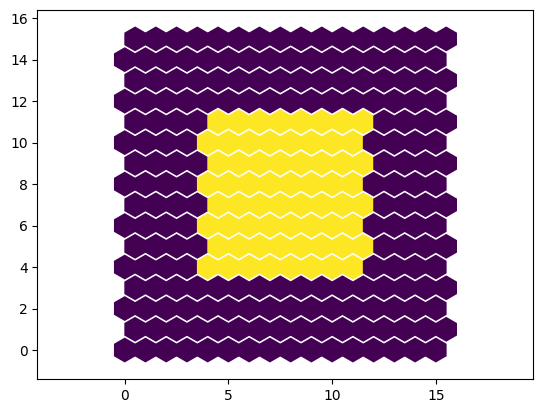

In [22]:
h_original = rect_unshift(h_shifted)
# back in offset coordinates
hexshow(h_original)

`fft` and `ifft` will automatically `rect_shift` and `rect_unshift` input in offset coordinates. Note the output of the transform is in the same coordinates as the input.

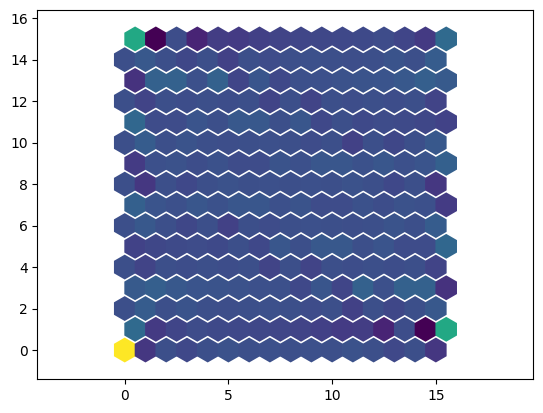

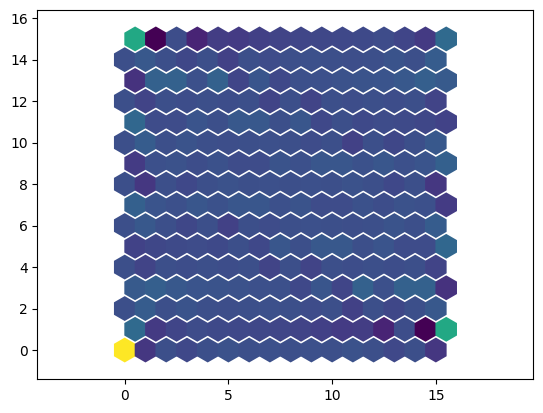

In [21]:
H1 = fft(h)
H2 = fft(rect_shift(h))

# the following two transforms will be identical, though if an oblique array is passed in
# an oblique array is returned

hexshow(np.real(H1))
hexshow(rect_unshift(np.real(H2)))